# Google Playstore Case Study

In this module you’ll be learning data visualisation with the help of a case study. This will enable you to understand how visualisation aids you in solving business problems. 

**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps? 
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?




### Session 1 - Introduction to Data Visualisation

In [2]:
#import the libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt

In [3]:
#read the dataset and check the first five rows
inp0 = pd.read_csv('googleplaystore_v2.csv', header=0)
inp0.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews     Size     Installs  Type Price Content Rating  \
0     159  19000.0      10,000+  Free     0       Everyone   
1     967  14000.0     500,000+  Free     0       Everyone   
2   87510   8700.0   5,000,000+  Free     0       Everyone   
3  215644  25000.0  50,000,000+  Free     0           Teen   
4     967   2800.0     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [4]:
#Check the shape of the dataframe
inp0.shape

(10841, 13)

### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column
 

In [5]:
#Check the datatypes of all the columns of the dataframe
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


#### Missing Value Treatment

In [6]:
#Check the number of null values in the columns
inp0.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing values for rating
 - Ratings is the target variable
 - drop the records

In [7]:
#Drop the rows having null values in the Rating field
inp1 = inp0[~inp0['Rating'].isnull()]

#Check the shape of the dataframe
inp1.shape

(9367, 13)

In [8]:
# Check the number of nulls in the Rating field again to cross-verify
inp1.Rating.isnull().sum()

0

In [9]:
#Question
#Check the number of nulls in the dataframe again and find the total number of null values
inp1.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [10]:
#Inspect the nulls in the Android Version column
inp1_check = inp1[inp1['Android Ver'].isnull()]
inp1_check

App         Category  Rating  \
4453                    [substratum] Vacuum: P  PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]  PERSONALIZATION     4.5   
10472  Life Made WI-Fi Touchscreen Photo Frame              1.9    19.0   

      Reviews          Size Installs  Type     Price Content Rating  \
4453      230  11000.000000   1,000+  Paid     $1.49       Everyone   
4490      189   2100.000000  10,000+  Free         0       Everyone   
10472    3.0M  21516.529524     Free     0  Everyone            NaN   

                  Genres    Last Updated Current Ver Android Ver  
4453     Personalization   July 20, 2018         4.4         NaN  
4490     Personalization  March 27, 2018         1.1         NaN  
10472  February 11, 2018          1.0.19  4.0 and up         NaN

In [11]:
#Drop the row having shifted values
inp1 = inp1 [~( (inp1['Android Ver'].isnull()) & (inp1['Category'] == '1.9') )]
#Check the nulls againin Android version column to cross-verify
print (inp1['Android Ver'].isnull().sum())
inp1[inp1['Android Ver'].isnull()]

2


App         Category  Rating Reviews     Size  \
4453  [substratum] Vacuum: P  PERSONALIZATION     4.4     230  11000.0   
4490    Pi Dark [substratum]  PERSONALIZATION     4.5     189   2100.0   

     Installs  Type  Price Content Rating           Genres    Last Updated  \
4453   1,000+  Paid  $1.49       Everyone  Personalization   July 20, 2018   
4490  10,000+  Free      0       Everyone  Personalization  March 27, 2018   

     Current Ver Android Ver  
4453         4.4         NaN  
4490         1.1         NaN

Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [12]:
inp1['Android Ver'].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
5.0 - 8.0                2
1.0 and up               2
4.0.3 - 7.1.1            2
5.0 - 6.0                1
7.0 - 7.1.1              1
4.1 - 7.1.1              1
Name: Android Ver, dtype: int64

In [13]:
#Check the most common value in the Android version column
typVal = inp1['Android Ver'].mode()[0]
inp1[inp1['Android Ver'] == typVal].count()

App               2059
Category          2059
Rating            2059
Reviews           2059
Size              2059
Installs          2059
Type              2059
Price             2059
Content Rating    2059
Genres            2059
Last Updated      2059
Current Ver       2059
Android Ver       2059
dtype: int64

In [14]:
#Fill up the nulls in the Android Version column with the above value
inp1['Android Ver'] = inp1['Android Ver'].fillna(typVal)

In [15]:
#Check the nulls in the Android version column again to cross-verify
inp1['Android Ver'].value_counts()

4.1 and up            2061
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
5.0 - 8.0                2
1.0 and up               2
4.0.3 - 7.1.1            2
5.0 - 6.0                1
7.0 - 7.1.1              1
4.1 - 7.1.1              1
Name: Android Ver, dtype: int64

In [16]:
inp1['Android Ver'].isnull().sum()

0

In [17]:
#Check the nulls in the entire dataframe again
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [18]:
inp1_check = inp1[inp1['Current Ver'].isnull()]
inp1_check

App            Category  Rating Reviews  \
15    Learn To Draw Kawaii Characters      ART_AND_DESIGN     3.2      55   
1553             Market Update Helper  LIBRARIES_AND_DEMO     4.1   20145   
6322           Virtual DJ Sound Mixer               TOOLS     4.2    4010   
7333                      Dots puzzle              FAMILY     4.0     179   

         Size    Installs  Type  Price Content Rating            Genres  \
15     2700.0      5,000+  Free      0       Everyone      Art & Design   
1553     11.0  1,000,000+  Free      0       Everyone  Libraries & Demo   
6322   8700.0    500,000+  Free      0       Everyone             Tools   
7333  14000.0     50,000+  Paid  $0.99       Everyone            Puzzle   

           Last Updated Current Ver Android Ver  
15         June 6, 2018         NaN  4.2 and up  
1553  February 12, 2013         NaN  1.5 and up  
6322       May 10, 2017         NaN  4.0 and up  
7333     April 18, 2018         NaN  4.0 and up

In [19]:
#Check the most common value in the Current version column
typVal = inp1['Current Ver'].mode()[0]
print (typVal)

Varies with device


In [20]:
#Replace the nulls in the Current version column with the above value
inp1['Current Ver'] = inp1['Current Ver'].fillna(typVal)

In [21]:
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [22]:
# Question : Check the most common value in the Current version column again
inp1['Current Ver'].value_counts()

Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
125                      1
1.3.21                   1
3.0.58                   1
4.11.2                   1
7.7                      1
Name: Current Ver, Length: 2638, dtype: int64

#### Handling Incorrect Data Types 

In [23]:
#Check the datatypes of all the columns 
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [24]:
#Analyse the Price column to check the issue
inp1.Price.value_counts()


0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$19.40        1
$3.28         1
$400.00       1
$1.76         1
$3.04         1
Name: Price, Length: 73, dtype: int64

In [25]:
#Write the function to make the changes
inp1.Price = inp1['Price'].apply(lambda x: 0 if x == '0' else float(x[1:]))

In [26]:
inp1.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

In [27]:
#Verify the dtype of Price once again
inp1.Price.dtype

dtype('float64')

In [28]:
inp1[inp1['Android Ver'] == inp1['Android Ver'].mode()[0]]['Price'].mean()

0.819160601649685

In [29]:
#Analyse the Reviews column
inp1.Reviews.value_counts()

2        83
3        78
5        74
4        74
1        67
         ..
401       1
3682      1
10538     1
10256     1
14253     1
Name: Reviews, Length: 5992, dtype: int64

In [30]:
#Change the dtype of this column
inp1.Reviews = inp1.Reviews.astype('int32')

#Check the quantitative spread of this dataframe
inp1.Reviews.describe()

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [31]:
#Analyse the Installs Column
inp1.head()


App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews     Size     Installs  Type  Price Content Rating  \
0      159  19000.0      10,000+  Free    0.0       Everyone   
1      967  14000.0     500,000+  Free    0.0       Everyone   
2    87510   8700.0   5,000,000+  Free    0.0       Everyone   
3   215644  25000.0  50,000,000+  Free    0.0           Teen   
4      967   2800.0     100,000+  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [32]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [33]:
inp1.Installs.value_counts()

1,000,000+        1577
10,000,000+       1252
100,000+          1150
10,000+           1010
5,000,000+         752
1,000+             713
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [34]:
#Question Clean the Installs Column and find the approximate number of apps at the 50th percentile.
def installs_clean (str1):
    str2 = str1.replace(',','').rstrip('+')
    return (int(str2))

inp1.Installs = inp1['Installs'].apply(installs_clean)

In [35]:
inp1.Installs.dtype

dtype('int64')

In [36]:
inp1.Installs.describe()

count    9.366000e+03
mean     1.789744e+07
std      9.123822e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [37]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


In [38]:
inp1['Rating'].describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [39]:
#Perform the sanity checks on the Reviews column
inp1 = inp1[~(inp1['Reviews'] > inp1['Installs'])]
inp1.shape

(9359, 13)

In [40]:
#perform the sanity checks on prices of free apps 
inp1[(inp1['Type'] == 'Free') & (inp1['Price'] >0)]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

In [41]:
inp1['Price'].describe()

count    9359.000000
mean        0.961116
std        15.822478
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

#### Outliers Analysis Using Boxplot

Now you need to start identifying and removing extreme values or __outliers__ from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available. This is where you’ll start utilising visualisation to achieve your tasks. And the best visualisation to use here would be the box plot. Boxplots are one of the best ways of analysing the spread of a numeric variable


Using a box plot you can identify the outliers as follows:

![BoxPlots to Identify Outliers](images\Boxplot.png)

- Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
- In the former case, you should determine whether or not removing them would add value to your analysis procedure.

- You can create a box plot directly from pandas dataframe or the matplotlib way as you learnt in the previous session. Check out their official documentation here:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
   - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

In [42]:
#import the plotting libraries



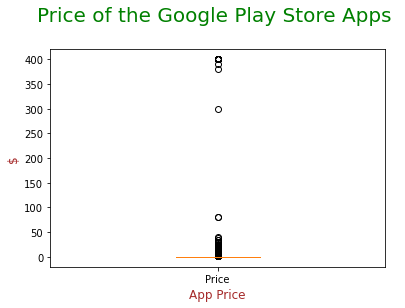

In [43]:
#Create a box plot for the price column
plt.boxplot(inp1['Price'], widths = 0.25, whis = 1.5)
plt.title('Price of the Google Play Store Apps \n', fontdict = {'fontsize':20, 'fontweight':6, 'color':'green'})
plt.xlabel('App Price', fontdict = {'fontsize': 12, 'fontweight': 5, 'color': 'brown'})
plt.ylabel('$', fontdict = {'fontsize': 12, 'fontweight': 5, 'color': 'brown'})
labels = ['Price']
ticks = [1]
plt.xticks(ticks,labels)
plt.show()

In [44]:
#Check the apps with price more than 200
inp1[inp1['Price']>200]

App   Category  Rating  Reviews     Size  \
4197          most expensive app (H)     FAMILY     4.3        6   1500.0   
4362                      💎 I'm rich  LIFESTYLE     3.8      718  26000.0   
4367        I'm Rich - Trump Edition  LIFESTYLE     3.6      275   7300.0   
5351                       I am rich  LIFESTYLE     3.8     3547   1800.0   
5354                  I am Rich Plus     FAMILY     4.0      856   8700.0   
5355                   I am rich VIP  LIFESTYLE     3.8      411   2600.0   
5356               I Am Rich Premium    FINANCE     4.1     1867   4700.0   
5357             I am extremely Rich  LIFESTYLE     2.9       41   2900.0   
5358                      I am Rich!    FINANCE     3.8       93  22000.0   
5359              I am rich(premium)    FINANCE     3.5      472    965.0   
5362                   I Am Rich Pro     FAMILY     4.4      201   2700.0   
5364  I am rich (Most expensive app)    FINANCE     4.1      129   2700.0   
5366                       I Am Rich     FAMILY     3.6      217   4900.0   
5369                       I am Rich    FINANCE     4.3      180   3800.0   
5373              I AM RICH PRO PLUS    FINANCE     4.0       36  41000.0   

      Installs  Type   Price Content Rating         Genres       Last Updated  \
4197       100  Paid  399.99       Everyone  Entertainment      July 16, 2018   
4362     10000  Paid  399.99       Everyone      Lifestyle     March 11, 2018   
4367     10000  Paid  400.00       Everyone      Lifestyle        May 3, 2018   
5351    100000  Paid  399.99       Everyone      Lifestyle   January 12, 2018   
5354     10000  Paid  399.99       Everyone  Entertainment       May 19, 2018   
5355     10000  Paid  299.99       Everyone      Lifestyle      July 21, 2018   
5356     50000  Paid  399.99       Everyone        Finance  November 12, 2017   
5357      1000  Paid  379.99       Everyone      Lifestyle       July 1, 2018   
5358      1000  Paid  399.99       Everyone        Finance  December 11, 2017   
5359      5000  Paid  399.99       Everyone        Finance        May 1, 2017   
5362      5000  Paid  399.99       Everyone  Entertainment       May 30, 2017   
5364      1000  Paid  399.99           Teen        Finance   December 6, 2017   
5366     10000  Paid  389.99       Everyone  Entertainment      June 22, 2018   
5369      5000  Paid  399.99       Everyone        Finance     March 22, 2018   
5373      1000  Paid  399.99       Everyone        Finance      June 25, 2018   

     Current Ver   Android Ver  
4197         1.0    7.0 and up  
4362       1.0.0    4.4 and up  
4367       1.0.1    4.1 and up  
5351         2.0  4.0.3 and up  
5354         3.0    4.4 and up  
5355       1.1.1    4.3 and up  
5356         1.6    4.0 and up  
5357         1.0    4.0 and up  
5358         1.0    4.1 and up  
5359         3.4    4.4 and up  
5362        1.54    1.6 and up  
5364           2  4.0.3 and up  
5366         1.5    4.2 and up  
5369         1.0    4.2 and up  
5373       1.0.2    4.1 and up

In [45]:
#Clean the Price column
inp2 = inp1[inp1['Price']<200]

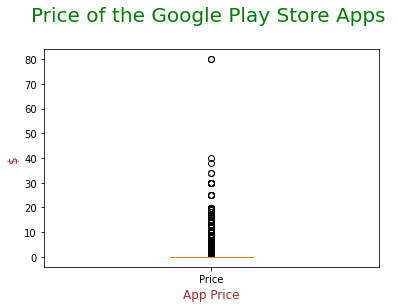

In [46]:
#Create a box plot for paid apps
plt.boxplot(inp2['Price'], widths = 0.25, whis = 1.5)
plt.title('Price of the Google Play Store Apps \n', fontdict = {'fontsize':20, 'fontweight':6, 'color':'green'})
plt.xlabel('App Price', fontdict = {'fontsize': 12, 'fontweight': 5, 'color': 'brown'})
plt.ylabel('$', fontdict = {'fontsize': 12, 'fontweight': 5, 'color': 'brown'})
labels = ['Price']
ticks = [1]
plt.xticks(ticks,labels)
plt.show()

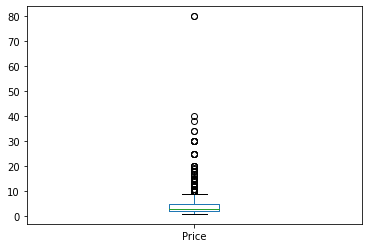

In [47]:
inp2[inp2.Price > 0].Price.plot.box()

In [48]:
#Check the apps with price more than 30
inp2[inp2['Price']>30]

App   Category  Rating  Reviews     Size  \
2253  Vargo Anesthesia Mega App    MEDICAL     4.6       92  32000.0   
2301    A Manual of Acupuncture    MEDICAL     3.5      214  68000.0   
2365  Vargo Anesthesia Mega App    MEDICAL     4.6       92  32000.0   
2402    A Manual of Acupuncture    MEDICAL     3.5      214  68000.0   
2414               LTC AS Legal    MEDICAL     4.0        6   1300.0   
5360           I am Rich Person  LIFESTYLE     4.2      134   1800.0   

      Installs  Type  Price Content Rating     Genres     Last Updated  \
2253      1000  Paid  79.99       Everyone    Medical    June 18, 2018   
2301      1000  Paid  33.99       Everyone    Medical  October 2, 2017   
2365      1000  Paid  79.99       Everyone    Medical    June 18, 2018   
2402      1000  Paid  33.99       Everyone    Medical  October 2, 2017   
2414       100  Paid  39.99       Everyone    Medical    April 4, 2018   
5360      1000  Paid  37.99       Everyone  Lifestyle    July 18, 2017   

     Current Ver   Android Ver  
2253        19.0  4.0.3 and up  
2301      2.1.35    4.0 and up  
2365        19.0  4.0.3 and up  
2402      2.1.35    4.0 and up  
2414       3.0.1    4.1 and up  
5360         1.0  4.0.3 and up

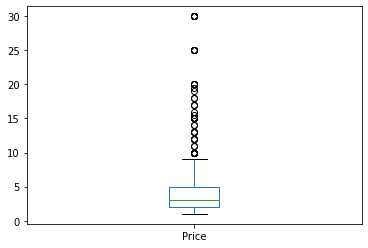

In [49]:
#Clean the Price column again
inp2 = inp2[inp2['Price']<30]
inp2[inp2.Price > 0].Price.plot.box()

### Histograms

Histograms can also be used in conjuction with boxplots for data cleaning and data handling purposes. You can use it to check the spread of a numeric variable. Histograms generally work by bucketing the entire range of values that a particular variable takes to specific __bins__. After that, it uses vertical bars to denote the total number of records in a specific bin, which is also known as its __frequency__.


![Histogram](images\Histogram.png)

You can adjust the number of bins to improve its granularity

![Bins change](images\Granular.png)

You'll be using plt.hist() to plot a histogram. Check out its official documentation:https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

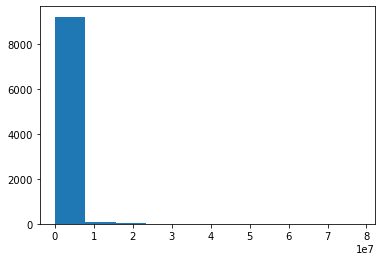

In [50]:
#Create a histogram of the Reviews
plt.hist(inp1['Reviews'])
plt.show()

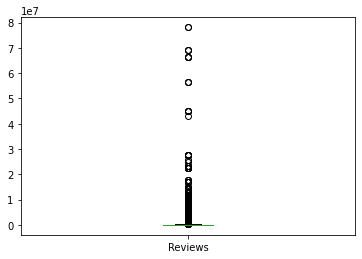

In [51]:
#Create a boxplot of the Reviews column
inp1['Reviews'].plot.box()


In [52]:
#Check records with 1 million reviews
inp2[inp2['Reviews']>=10000000]

App       Category  \
335            Messenger – Text and Video Chat for Free  COMMUNICATION   
336                                  WhatsApp Messenger  COMMUNICATION   
342                                     Viber Messenger  COMMUNICATION   
378         UC Browser - Fast Download Private & Secure  COMMUNICATION   
381                                  WhatsApp Messenger  COMMUNICATION   
...                                                 ...            ...   
6449                        BBM - Free Calls & Messages  COMMUNICATION   
7536  Security Master - Antivirus, VPN, AppLock, Boo...          TOOLS   
7937                                     Shadow Fight 2           GAME   
8894  Cache Cleaner-DU Speed Booster (booster & clea...          TOOLS   
8896  DU Battery Saver - Battery Charger & Battery Life          TOOLS   

      Rating   Reviews          Size    Installs  Type  Price Content Rating  \
335      4.0  56642847  21516.529524  1000000000  Free    0.0       Everyone   
336      4.4  69119316  21516.529524  1000000000  Free    0.0       Everyone   
342      4.3  11334799  21516.529524   500000000  Free    0.0       Everyone   
378      4.5  17712922  40000.000000   500000000  Free    0.0           Teen   
381      4.4  69119316  21516.529524  1000000000  Free    0.0       Everyone   
...      ...       ...           ...         ...   ...    ...            ...   
6449     4.3  12843436  21516.529524   100000000  Free    0.0       Everyone   
7536     4.7  24900999  21516.529524   500000000  Free    0.0       Everyone   
7937     4.6  10981850  88000.000000   100000000  Free    0.0   Everyone 10+   
8894     4.5  12759815  15000.000000   100000000  Free    0.0       Everyone   
8896     4.5  13479633  14000.000000   100000000  Free    0.0       Everyone   

             Genres    Last Updated         Current Ver         Android Ver  
335   Communication  August 1, 2018  Varies with device  Varies with device  
336   Communication  August 3, 2018  Varies with device  Varies with device  
342   Communication   July 18, 2018  Varies with device  Varies with device  
378   Communication  August 2, 2018         12.8.5.1121          4.0 and up  
381   Communication  August 3, 2018  Varies with device  Varies with device  
...             ...             ...                 ...                 ...  
6449  Communication  August 2, 2018  Varies with device        4.0.3 and up  
7536          Tools  August 4, 2018               4.6.6  Varies with device  
7937         Action    July 2, 2018              1.9.38          3.0 and up  
8894          Tools   July 25, 2018               3.1.2          4.0 and up  
8896          Tools    June 5, 2018             4.8.7.8          4.0 and up  

[92 rows x 13 columns]

In [53]:
#Drop the above records
inp3 = inp2[ inp2['Reviews'] <= 1000000]
inp3.shape

(8634, 13)

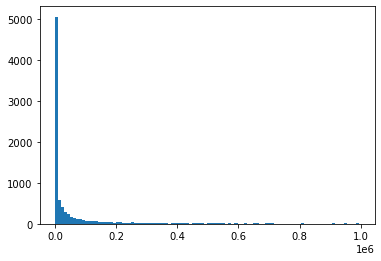

In [54]:
#Question - Create a histogram again and check the peaks
plt.hist(inp3['Reviews'],bins=100)
plt.show()


990000.0


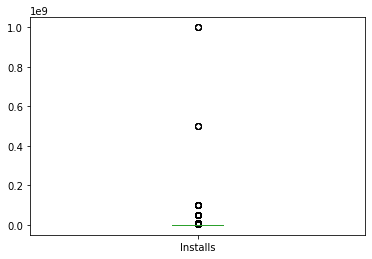

In [55]:
#Question - Create a box plot for the Installs column and report back the IQR
inp3['Installs'].plot.box()
IQR_Installs = inp3['Installs'].quantile(.75) - inp3['Installs'].quantile(.25)
print (IQR_Installs)


In [56]:
#Question - CLean the Installs by removing all the apps having more than or equal to 100 million installs
inp4 = inp3[inp3['Installs']<=100000000]
inp4.shape

(8624, 13)

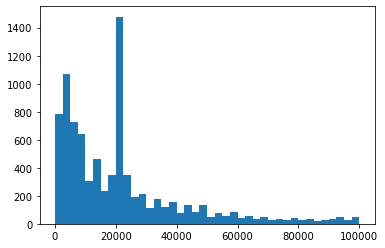

In [57]:
#Plot a histogram for Size as well.
plt.hist(inp4['Size'], bins = 40)
plt.show()

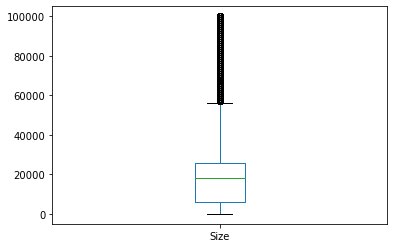

In [58]:
#Question - Create a boxplot for the Size column and report back the median value
inp4.Size.plot.box()

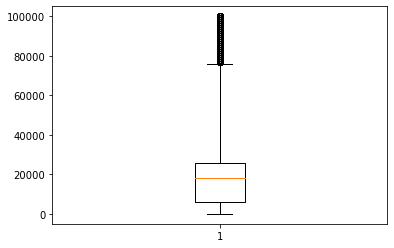

In [59]:
plt.boxplot(inp4.Size,whis=2.5)
plt.show()

### Session 2 - Data Visualisation with Seaborn

Seaborn is Python library to create statistical graphs easily. It is built on top of matplotlib and closely integrated with pandas.

_Functionalities of Seaborn_ :

- Dataset oriented API
- Analysing univariate and bivariate distributions
- Automatic estimation and plotting of  linear regression models
- Convenient views for complex datasets
- Concise control over style
- Colour palettes


In [60]:
inp4.Rating.dtype

dtype('float64')

In [63]:
#import the necessary libraries
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

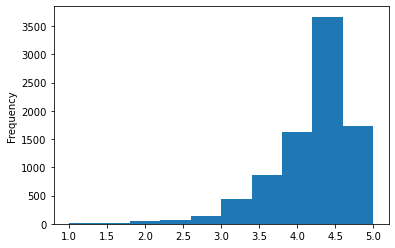

In [64]:
inp4.Rating.plot.hist()

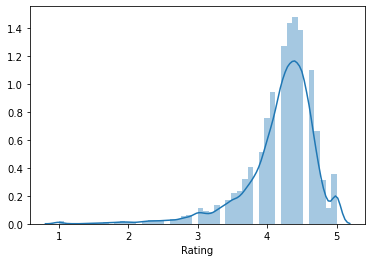

In [74]:
sns.distplot(inp1.Rating)
plt.show()

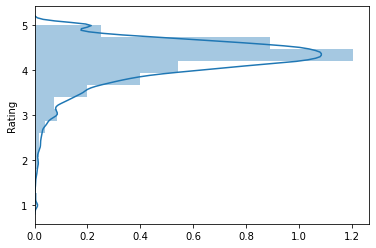

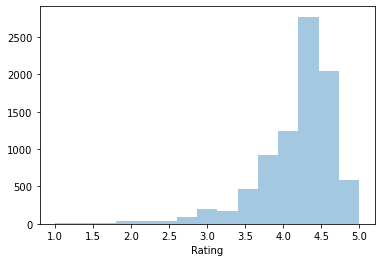

In [82]:
sns.distplot(inp4.Rating,bins = 15, vertical = True)
plt.show()

sns.distplot(inp4.Rating,bins = 15, kde = False)
plt.show()

#### Distribution Plots

A distribution plot is pretty similar to the histogram functionality in matplotlib. Instead of a frequency plot, it plots an approximate probability density for that rating bucket. And the curve (or the __KDE__) that gets drawn over the distribution is the approximate probability density curve. 

The following is an example of a distribution plot. Notice that now instead of frequency on the left axis, it has the density for each bin or bucket.

![Distplot](images\Distplot.png)

You'll be using sns.distplot for plotting a distribution plot. Check out its official documentation: https://seaborn.pydata.org/generated/seaborn.distplot.html

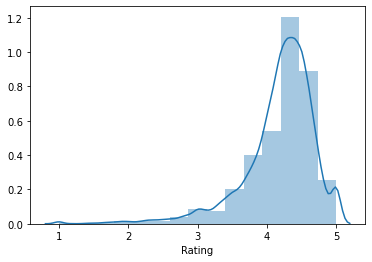

In [83]:
#Create a distribution plot for rating
sns.distplot(inp4.Rating,bins = 15, kde = True)
plt.show()

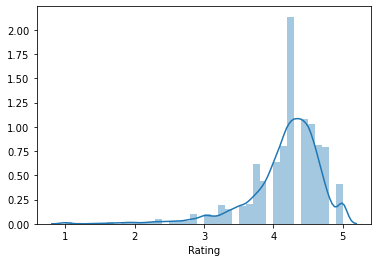

In [85]:
#Change the number of bins
sns.distplot(inp4.Rating,bins = 40, kde = True)
plt.show()


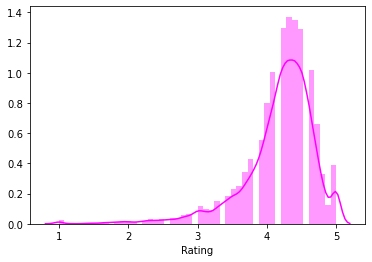

In [88]:
#Change the colour of bins to green
sns.distplot(inp4.Rating,bins = 50, kde = True, color='magenta')
plt.show()

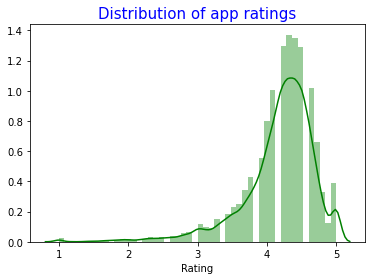

In [90]:
#Apply matplotlib functionalities
sns.distplot(inp4.Rating,bins = 50, kde = True, color='green')
plt.title('Distribution of app ratings', fontdict={'fontsize':15, 'color':'blue'})
plt.show()


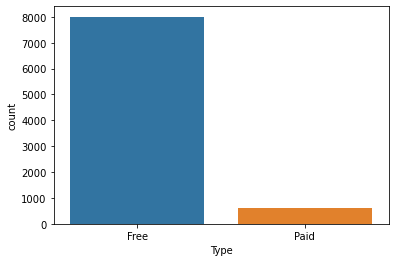

In [100]:
sns.countplot(x='Type', data=inp4)

#### Styling Options

One of the biggest advantages of using Seaborn is that you can retain its aesthetic properties and also the Matplotlib functionalities to perform additional customisations. Before we continue with our case study analysis, let’s study some styling options that are available in Seaborn.

-  Check out the official documentation:https://seaborn.pydata.org/generated/seaborn.set_style.html

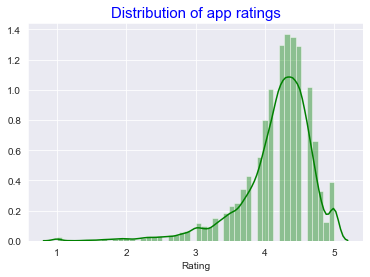

In [102]:
sns.set_style('darkgrid')
sns.distplot(inp4.Rating,bins = 50, kde = True, color='green')
plt.title('Distribution of app ratings', fontdict={'fontsize':15, 'color':'blue'})
plt.show()

In [104]:
#Check all the styling options
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

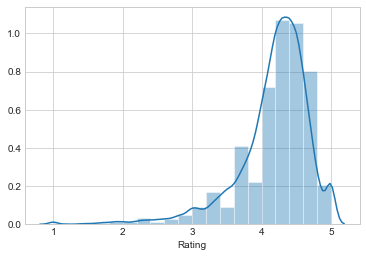

In [106]:
#Change the number of bins to 20
plt.style.use('seaborn-whitegrid')
sns.distplot(inp4.Rating,bins=20)
plt.show()

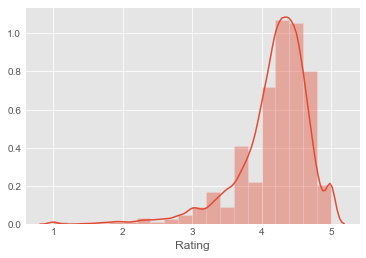

In [107]:
#Change the number of bins to 20
plt.style.use('ggplot')
sns.distplot(inp4.Rating,bins=20)
plt.show()

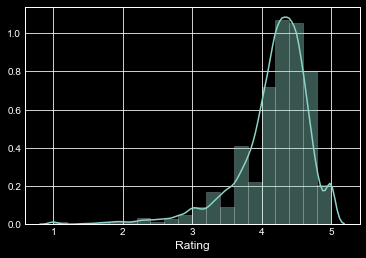

In [108]:
plt.style.use('dark_background')
sns.distplot(inp4.Rating,bins=20)
plt.show()

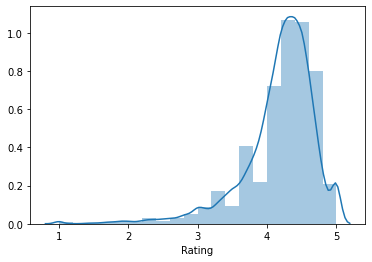

In [110]:
plt.style.use('default')
%matplotlib inline
sns.distplot(inp4.Rating,bins=20)
plt.show()

In [114]:
inp4['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [120]:
inp4 = inp4[~((inp4['Content Rating'] == 'Adults only 18+') | (inp4['Content Rating'] == 'Unrated'))]

In [122]:
inp4.shape

(8620, 13)

In [123]:
inp4.reset_index(inplace = True, drop= True)

#### Pie-Chart and Bar Chart

For analysing how a numeric variable changes across several categories of a categorical variable you utilise either a pie chart or a box plot

For example, if you want to visualise the responses of a marketing campaign, you can use the following views:

![PieChart](images\pie.png)

![barChart](images\bar.png)

- You'll be using the pandas method of plotting both a pie chart and a bar chart. Check out their official documentations:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

In [ ]:
#Analyse the Content Rating column


In [ ]:
#Remove the rows with values which are less represented 


In [ ]:
#Reset the index


In [ ]:
#Check the apps belonging to different categories of Content Rating 


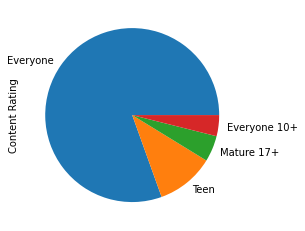

In [124]:
#Plot a pie chart
inp4['Content Rating'].value_counts().plot.pie()
plt.show()


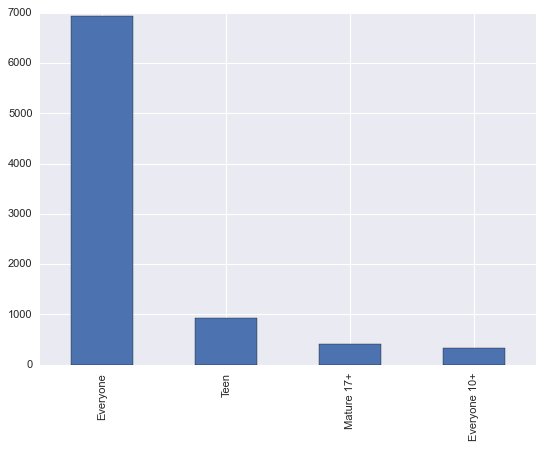

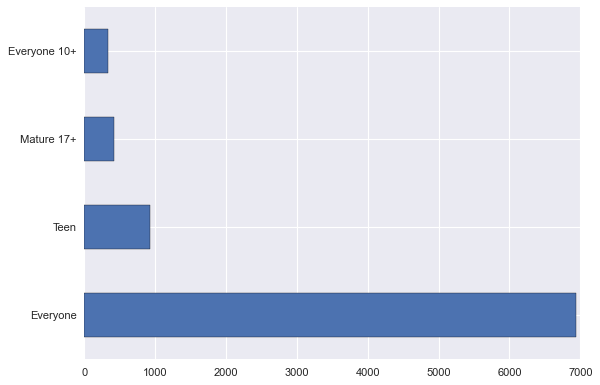

In [130]:
#Plot a bar chart
plt.style.use('seaborn-notebook')
inp4['Content Rating'].value_counts().plot.bar()
plt.show()

plt.style.use('seaborn')
inp4['Content Rating'].value_counts().plot.barh()
plt.show()

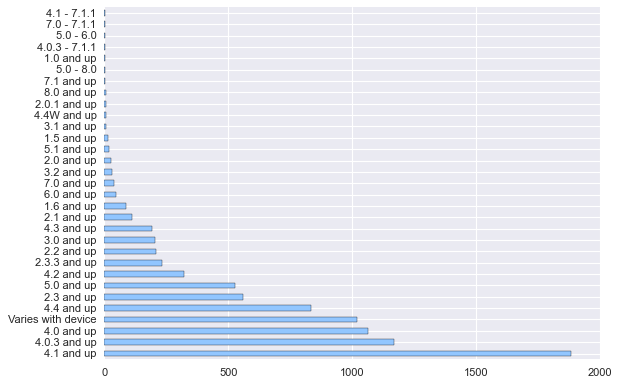

In [131]:
#Question - Plot a bar plot for checking the 4th highest Android version type
plt.style.use('seaborn-pastel')
inp4['Android Ver'].value_counts().plot.barh()
plt.show()

#### Scatter Plots

Scatterplots are perhaps one of the most commonly used as well one of the most powerful visualisations you can use in the field of machine learning. They are pretty crucial in revealing relationships between the data points and you can generally deduce some sort of trends in the data with the help of a scatter plot. 

![Scatterplot](images\scatter.png)

- They're pretty useful in regression problems to check whether a linear trend exists in the data or not. For example, in the image below, creating a linear model in the first case makes far more sense since a clear straight line trend is visible.

![Scatterplot-Reg](images\regression3.png)

- Also, they help in observing __naturally occuring clusters__. In the following image, the marks of students in Maths and Biology has been plotted.You can clearly group the students to 4 clusters now. Cluster 1 are students who score very well in Biology but very poorly in Maths, Cluster 2 are students who score equally well in both the subjects and so on.

![Scatter-Clusters](images\Clusters.png)

**Note**: You'll be studying about both Regression and Clustering in greater detail in the machine learning modules

You'll be using **sns.jointplot()** for creating a scatter plot. Check out its documentation:
https://seaborn.pydata.org/generated/seaborn.jointplot.html

In [152]:
?plt.scatter

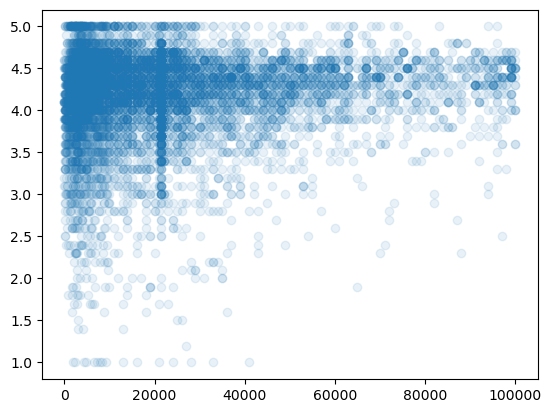

In [154]:
plt.style.use('default')
plt.scatter(inp1['Size'], inp1['Rating'], alpha=0.1)
plt.show()

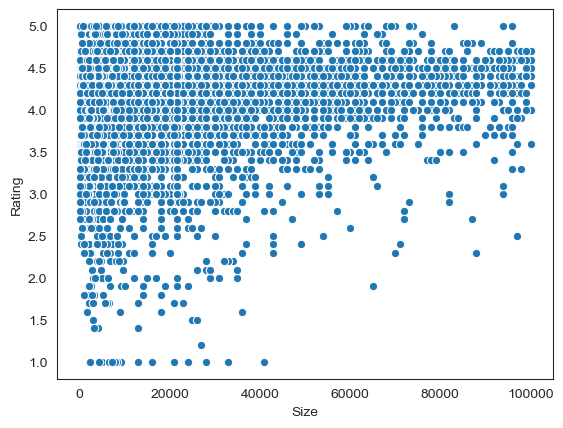

In [136]:
sns.set_style('white')
sns.scatterplot(inp1['Size'], inp1['Rating'])
plt.show()

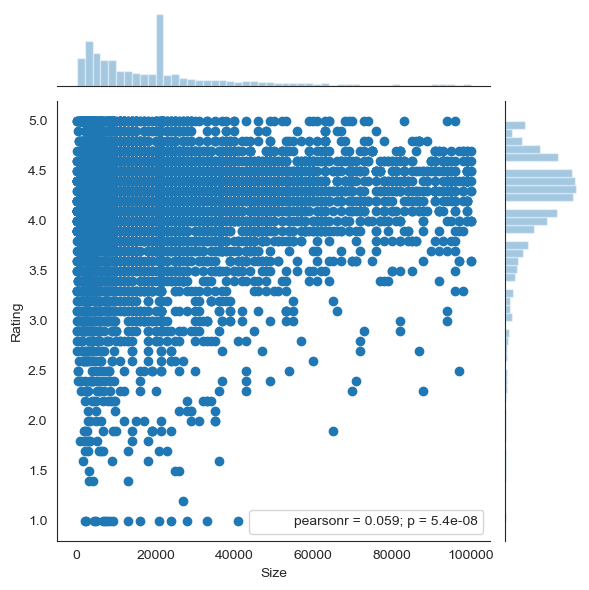

In [144]:
import scipy.stats as stats
sns.set_style('white')
sns.jointplot(inp4['Size'], inp4['Rating'],stat_func = stats.pearsonr)
plt.show()

In [ ]:
###Size vs Rating

##Plot a scatter-plot in the matplotlib way between Size and Rating


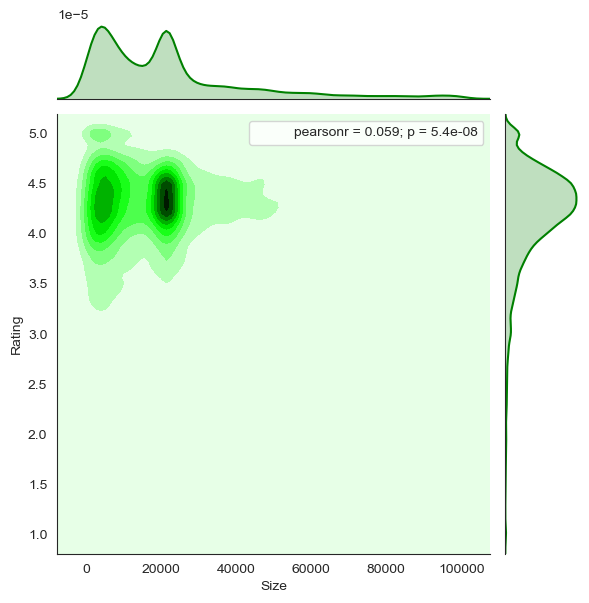

In [146]:
### Plot the same thing now using a jointplot
sns.set_style('white')
sns.jointplot(inp4['Size'], inp4['Rating'],stat_func = stats.pearsonr, kind='kde', color='g')
plt.show()

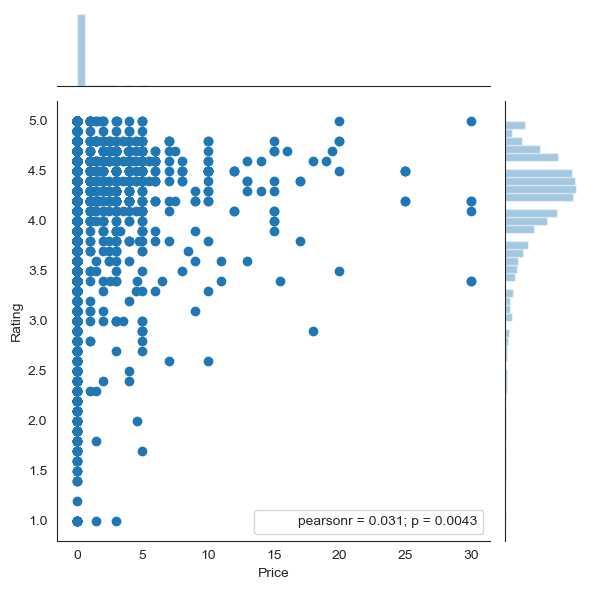

In [147]:
## Plot a jointplot for Price and Rating
sns.set_style('white')
sns.jointplot(inp4['Price'], inp4['Rating'],stat_func = stats.pearsonr)
plt.show()

**Reg Plots**

- These are an extension to the jointplots, where a regression line is added to the view 

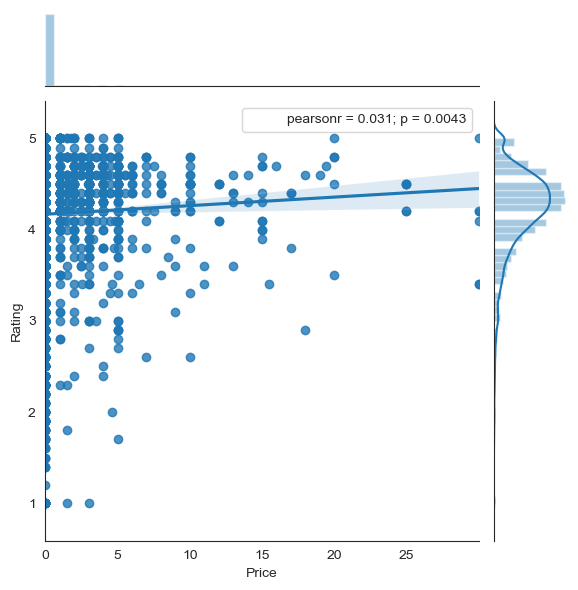

In [151]:
##Plot a reg plot for Price and Rating and observe the trend
sns.jointplot(inp4['Price'], inp4['Rating'],kind='reg',stat_func=stats.pearsonr)
plt.show()


In [ ]:
## Question - Plot a reg plot for Price and Rating again for only the paid apps.


**Pair Plots**

 - When you have several numeric variables, making multiple scatter plots becomes rather tedious. Therefore, a pair plot visualisation is preferred where all the scatter plots are in a single view in the form of a matrix
 - For the non-diagonal views, it plots a **scatter plot** between 2 numeric variables
 - For the diagonal views, it plots a **histogram**

Pair Plots help in identifying the trends between a target variable and the predictor variables pretty quickly. For example, say you want to predict how your company’s profits are affected by three different factors. In order to choose which you created a pair plot containing profits and the three different factors as the variables. Here are the scatterplots of profits vs the three variables that you obtained from the pair plot.

![Pairplots](images\pairplots2.png)

It is clearly visible that the left-most factor is the most prominently related to the profits, given how linearly scattered the points are and how randomly scattered the rest two factors are.

You'll be using **sns.pairplot()** for this visualisation. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [159]:
?sns.pairplot

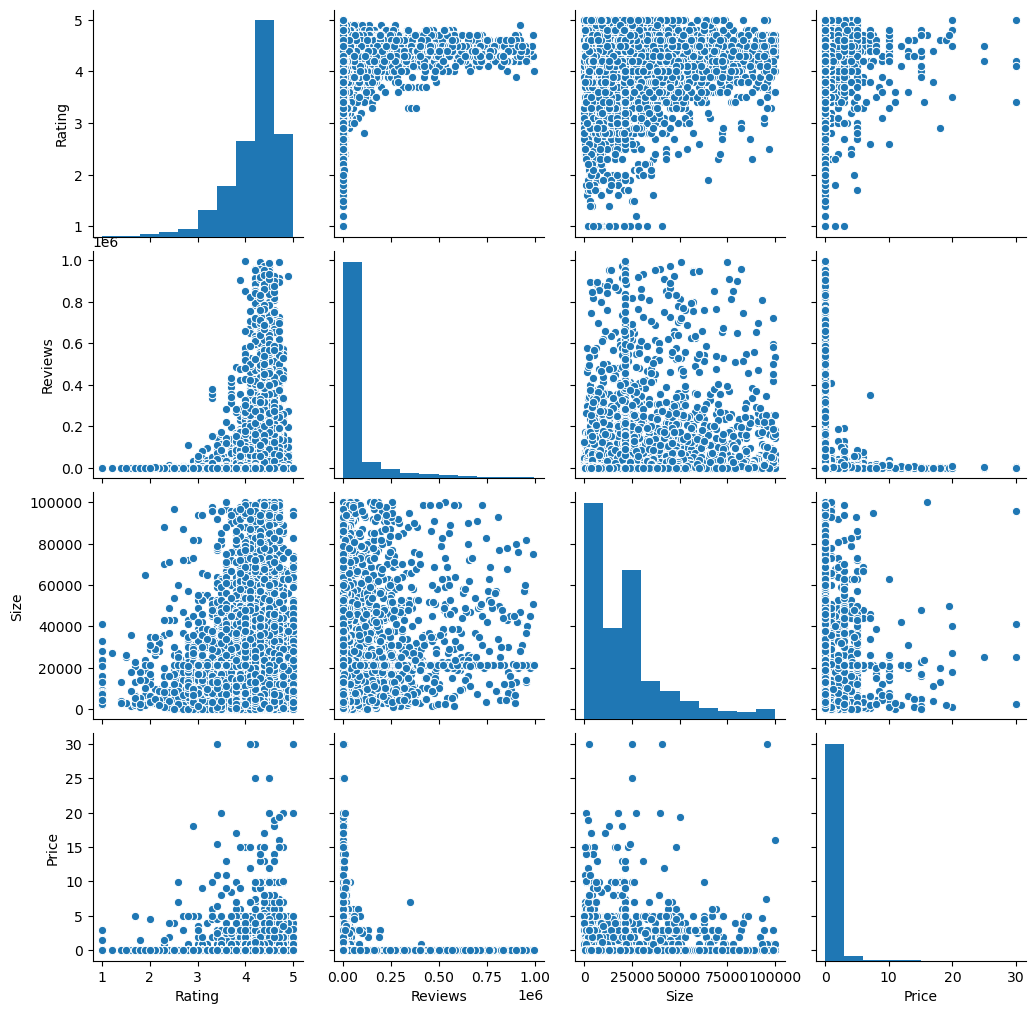

In [161]:
## Create a pair plot for Reviews, Size, Price and Rating
sns.pairplot(inp4[['Rating','Reviews','Size','Price']], palette = 'seaborn')
plt.show()

**Bar Charts Revisited**

- Here, you'll be using bar charts once again, this time using the **sns.barplot()** function. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.barplot.html
- You can modify the **estimator** parameter to change the aggregation value of your barplot

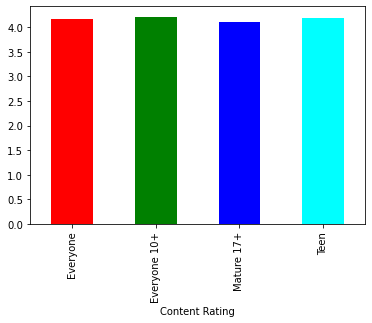

In [182]:
##Plot a bar plot of Content Rating vs Average Rating 
plt.style.use('default')
%matplotlib inline
inp4.groupby(by= ['Content Rating'])['Rating'].mean().plot.bar(color=['r','g','b','cyan'])

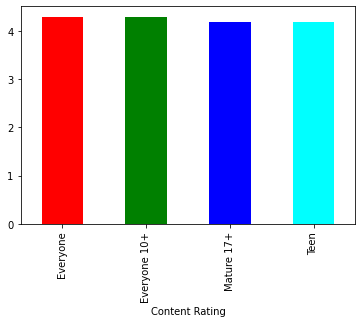

In [187]:
##Plot the bar plot again with Median Rating
inp4.groupby(by= ['Content Rating'])['Rating'].median().plot.bar(color=['r','g','b','cyan'])
plt.show()


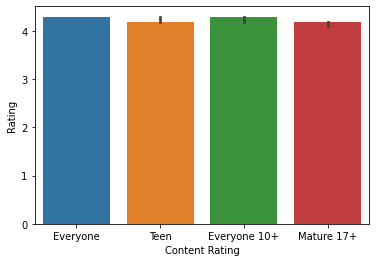

In [188]:
##Plot the above bar plot using the estimator parameter

sns.barplot(data=inp4, x= 'Content Rating', y='Rating', estimator = np.median)
plt.show()


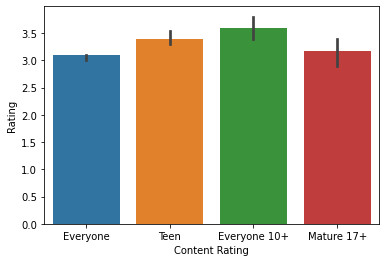

In [189]:
##Plot the bar plot with only the 5th percentile of Ratings

sns.barplot(data=inp4, x= 'Content Rating', y='Rating', estimator = (lambda x: np.quantile(x,0.05)))
plt.show()

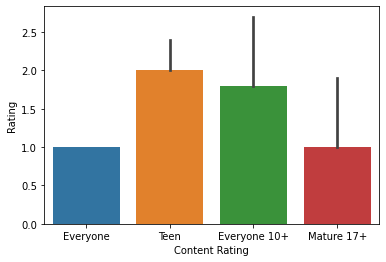

In [190]:
##Question - Plot the bar plot with the minimum Rating
sns.barplot(data=inp4, x= 'Content Rating', y='Rating', estimator = np.min)
plt.show()

In [192]:
inp4.App.value_counts()

CBS Sports App - Scores, News, Stats & Watch Live           8
ESPN                                                        7
Bleacher Report: sports news, scores, & highlights          6
Bubble Shooter                                              6
Nick                                                        6
                                                           ..
Calculator - unit converter                                 1
Gainesville Bus Tracker                                     1
Chatting - Free chat, random chat, boyfriend, girlfriend    1
Full Screen Caller ID                                       1
Power Pop Bubbles                                           1
Name: App, Length: 7812, dtype: int64

In [193]:
inp4[inp4['App']== 'ESPN']

App Category  Rating  Reviews          Size  Installs  Type  Price  \
2450  ESPN   SPORTS     4.2   521138  21516.529524  10000000  Free    0.0   
2501  ESPN   SPORTS     4.2   521138  21516.529524  10000000  Free    0.0   
2509  ESPN   SPORTS     4.2   521138  21516.529524  10000000  Free    0.0   
2538  ESPN   SPORTS     4.2   521140  21516.529524  10000000  Free    0.0   
2550  ESPN   SPORTS     4.2   521140  21516.529524  10000000  Free    0.0   
2562  ESPN   SPORTS     4.2   521140  21516.529524  10000000  Free    0.0   
3386  ESPN   SPORTS     4.2   521081  21516.529524  10000000  Free    0.0   

     Content Rating  Genres   Last Updated         Current Ver Android Ver  
2450   Everyone 10+  Sports  July 19, 2018  Varies with device  5.0 and up  
2501   Everyone 10+  Sports  July 19, 2018  Varies with device  5.0 and up  
2509   Everyone 10+  Sports  July 19, 2018  Varies with device  5.0 and up  
2538   Everyone 10+  Sports  July 19, 2018  Varies with device  5.0 and up  
2550   Everyone 10+  Sports  July 19, 2018  Varies with device  5.0 and up  
2562   Everyone 10+  Sports  July 19, 2018  Varies with device  5.0 and up  
3386   Everyone 10+  Sports  July 19, 2018  Varies with device  5.0 and up

__Box Plots Revisited__

- Apart from outlier analysis, box plots are great at comparing the spread and analysing a numerical variable across several categories
- Here you'll be using **sns.boxplot()** function to plot the visualisation. Check out its documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html




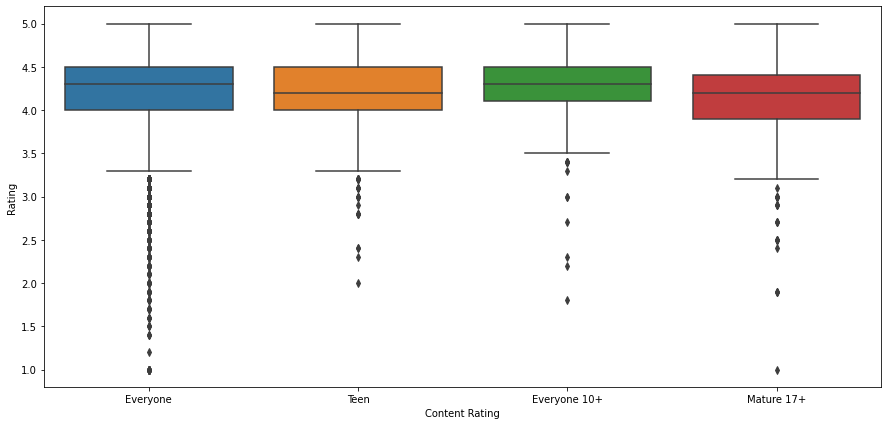

In [194]:
##Plot a box plot of Rating vs Content Rating
plt.figure(figsize=[15,7])
sns.boxplot(inp4['Content Rating'], inp4['Rating'])
plt.show()

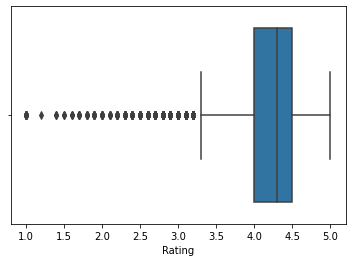

In [198]:
##Question - Plot a box plot for the Rating column only
sns.boxplot(inp4.Rating)
plt.show()

In [218]:
##Question - Plot a box plot of Ratings across the 4 most popular Genres
inp4.Genres.value_counts()[:4]

Tools            694
Entertainment    508
Education        464
Medical          344
Name: Genres, dtype: int64

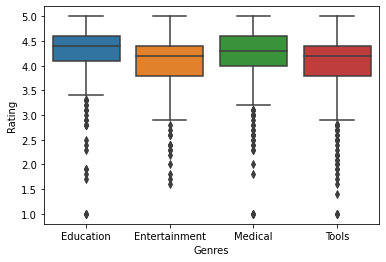

In [231]:
inp5  = inp1[inp1['Genres'].isin(['Tools','Entertainment','Medical','Education'])]
sns.boxplot(inp5['Genres'], inp5['Rating'])
plt.show()

#### Heat Maps

Heat mapsutilise the concept of using colours and colour intensities to visualise a range of values. You must have seen heat maps in cricket or football broadcasts on television to denote the players’ areas of strength and weakness.

![HeatMap](images\heatmap1.png)

- In python, you can create a heat map whenever you have a rectangular grid or table of numbers analysing any two features

![heatmap2](images\heatmap2.png)

- You'll be using **sns.heatmap()** to plot the visualisation. Checkout its official documentation :https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [232]:
?pd.qcut

In [237]:
##Ratings vs Size vs Content Rating
inp4['Size_Cat']=pd.qcut(inp4.Size, q=[0,0.2,0.4,0.6,0.8,1.0], labels = ['VL', 'L', 'M', 'H', 'VH'])
inp4 = inp4.rename(columns={'Size_Cat':'Size_Buckets'})
##Prepare buckets for the Size column using pd.qcut



In [244]:
##Create a pivot table for Size_buckets and Content Rating with values set to Rating
pvt_inp4 = inp4.pivot_table(index='Content Rating', columns='Size_Buckets', values='Rating', aggfunc=np.mean)
pvt_inp4

Size_Buckets          VL         L         M         H        VH
Content Rating                                                  
Everyone        4.117536  4.158405  4.215784  4.170799  4.187302
Everyone 10+    4.189474  4.207407  4.238318  4.193443  4.217073
Mature 17+      3.978947  4.124211  4.021705  4.155172  4.193814
Teen            4.184848  4.233094  4.143310  4.198131  4.246154

In [245]:
##Change the aggregation to median
pvt_inp4 = inp4.pivot_table(index='Content Rating', columns='Size_Buckets', values='Rating', aggfunc=np.median)
pvt_inp4

Size_Buckets      VL    L    M    H   VH
Content Rating                          
Everyone        4.20  4.3  4.3  4.3  4.3
Everyone 10+    4.10  4.3  4.3  4.3  4.3
Mature 17+      4.25  4.2  4.1  4.1  4.2
Teen            4.20  4.3  4.2  4.2  4.3

In [246]:
##Change the aggregation to 20th percentile
pvt_inp4 = inp4.pivot_table(index='Content Rating', columns='Size_Buckets', values='Rating', aggfunc=(lambda x: np.quantile(x,0.2)))
pvt_inp4

Size_Buckets      VL     L    M    H   VH
Content Rating                           
Everyone        3.80  3.80  4.0  3.8  3.9
Everyone 10+    3.86  3.92  4.1  4.0  4.0
Mature 17+      3.30  3.68  3.7  3.9  4.0
Teen            3.80  3.90  3.9  4.0  4.0

In [ ]:
##Store the pivot table in a separate variable


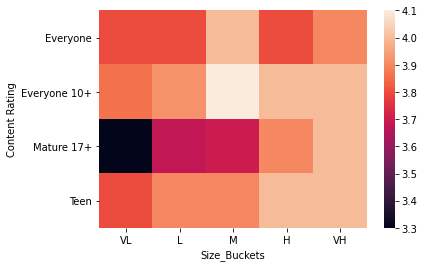

In [247]:
##Plot a heat map
sns.heatmap(pvt_inp4)
plt.show()

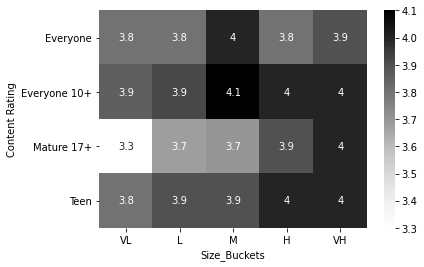

In [248]:
##Apply customisations
sns.heatmap(pvt_inp4, cmap='Greys', annot=True)
plt.show()

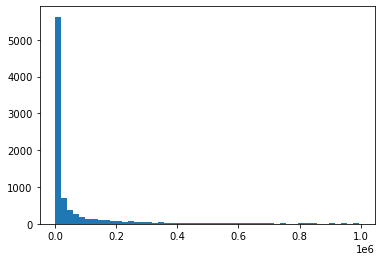

[5.627e+03 6.940e+02 3.820e+02 2.680e+02 1.930e+02 1.270e+02 1.350e+02
 9.700e+01 9.300e+01 6.900e+01 7.400e+01 5.800e+01 6.500e+01 5.700e+01
 5.900e+01 4.300e+01 3.200e+01 5.000e+01 2.100e+01 2.300e+01 3.400e+01
 2.200e+01 1.700e+01 2.400e+01 2.900e+01 2.600e+01 3.100e+01 2.100e+01
 1.800e+01 1.800e+01 1.000e+01 1.500e+01 1.800e+01 1.300e+01 1.300e+01
 1.700e+01 5.000e+00 1.100e+01 8.000e+00 8.000e+00 1.300e+01 1.300e+01
 1.100e+01 5.000e+00 6.000e+00 1.400e+01 7.000e+00 9.000e+00 7.000e+00
 1.000e+01] [1.0000000e+00 1.9901020e+04 3.9801040e+04 5.9701060e+04 7.9601080e+04
 9.9501100e+04 1.1940112e+05 1.3930114e+05 1.5920116e+05 1.7910118e+05
 1.9900120e+05 2.1890122e+05 2.3880124e+05 2.5870126e+05 2.7860128e+05
 2.9850130e+05 3.1840132e+05 3.3830134e+05 3.5820136e+05 3.7810138e+05
 3.9800140e+05 4.1790142e+05 4.3780144e+05 4.5770146e+05 4.7760148e+05
 4.9750150e+05 5.1740152e+05 5.3730154e+05 5.5720156e+05 5.7710158e+05
 5.9700160e+05 6.1690162e+05 6.3680164e+05 6.5670166e+05 6.766016

In [267]:
out1, out2,out3 = plt.hist(inp4.Reviews,bins=50)
plt.show()
print (out1, out2)

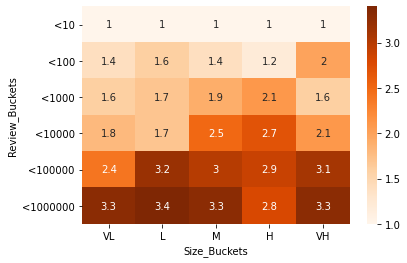

In [269]:
##Question - Replace Content Rating with Review_buckets in the above heat map
rev_cat = [0,10,100,1000,10000,100000,1000000]
##Keep the aggregation at minimum value for Rating
inp4['Review_Buckets']=pd.cut(inp4.Reviews, bins = rev_cat, labels = ['<10', '<100', '<1000', '<10000', '<100000', '<1000000'])
pvt1_inp4 = inp4.pivot_table(index='Review_Buckets', columns='Size_Buckets', values='Rating', aggfunc = np.min)
sns.heatmap(pvt1_inp4, cmap='Oranges',annot=True )
plt.show()

### Session 3: Additional Visualisations

#### Line Plots

- A line plot tries to observe trends using time dependent data.
-  For this part, you'll be using **pd.to_datetime()** function. Check out its documentation:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html


In [271]:
## Extract the month from the Last Updated Date
inp4['Day'] = pd.to_datetime(inp4['Last Updated']).dt.day
inp4['Month'] = pd.to_datetime(inp4['Last Updated']).dt.month
inp4['Year'] = pd.to_datetime(inp4['Last Updated']).dt.year

In [274]:
## Find the average Rating across all the months
Monthly_Ratings=inp4.groupby(by='Month').Rating.mean()


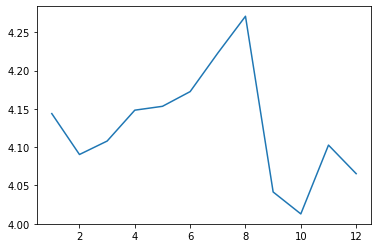

In [280]:
## Plot a line graph
plt.plot(Monthly_Ratings)
plt.show()

#### Stacked Bar Charts

- A stacked bar chart breaks down each bar of the bar chart on the basis of a different category
- For example, for the Campaign Response bar chart you saw earlier, the stacked bar chart is also showing the Gender bifurcation as well

![Stacked](images\stacked.png)

In [287]:
inp4.Month

0       1
1       1
2       8
3       6
4       6
       ..
8615    6
8616    7
8617    7
8618    1
8619    7
Name: Month, Length: 8620, dtype: int64

In [294]:
## Create a pivot table for Content Rating and updated Month with the values set to Installs
pvt2_inp4 = pd.pivot_table(data=inp4, index='Month', columns='Content Rating', values='Installs', aggfunc=sum)
pvt2_inp4

Content Rating    Everyone  Everyone 10+  Mature 17+        Teen
Month                                                           
1                925387390     105282000     9701210    44159010
2                545372005      19821000    13021500    39597710
3                695365520      30322510     9111100    79850310
4                973371180      23300000     5259000   161619410
5               1861067800     118173500    50140100   202689600
6               2427170505     317727100   145257200   415716600
7               7771109680     456556000   419491910  1943556800
8               5930943320     215821000   312981700  1257855650
9                260340410      24931100     2201010    22483100
10               258279680      23101000     3160000    45629210
11               625424710      60310000     1070100    31261100
12               567105770       8410000    12960100    51707100

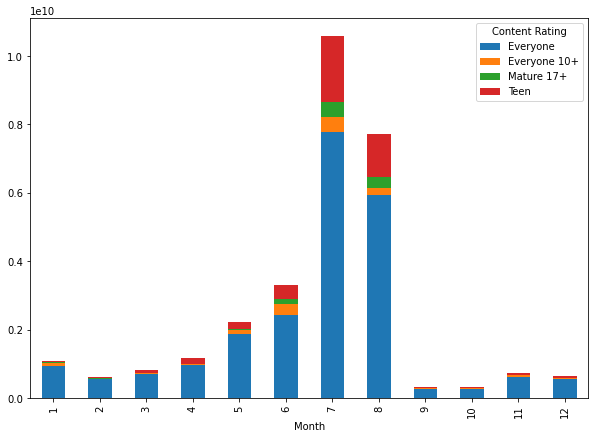

In [295]:
##Plot the stacked bar chart.
pvt2_inp4.plot(kind='bar',stacked=True, figsize=[10,7])
plt.show()

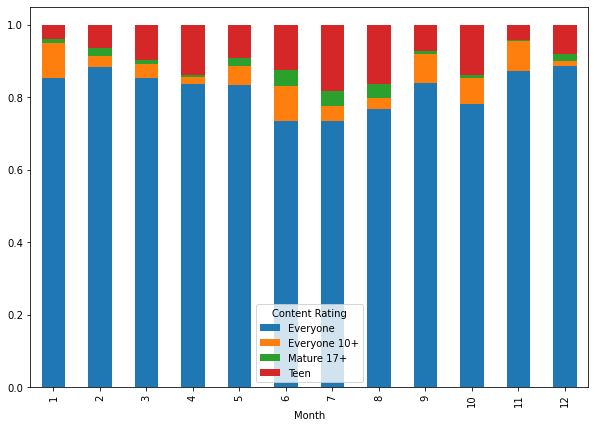

In [300]:
##Plot the stacked bar chart again wrt to the proportions.
proport = pvt2_inp4[['Everyone','Everyone 10+','Mature 17+','Teen']].apply(lambda x: x/x.sum(), axis=1)
proport.plot(kind='bar', stacked=True, figsize=[10,7])

#### Plotly

Plotly is a Python library used for creating interactive visual charts. You can take a look at how you can use it to create aesthetic looking plots with a lot of user-friendly functionalities like hover, zoom, etc.

Check out this link for installation and documentation:https://plot.ly/python/getting-started/

In [317]:
#Install plotly


SyntaxError: invalid syntax (<ipython-input-317-0763d693dd91>, line 2)

In [313]:
#Take the table you want to plot in a separate variable
res5 = inp4.groupby(['Month'])['Rating'].mean()
res5_df = pd.DataFrame({'Month':res5.index, 'Rating':res5.values})
res5_df

Month    Rating
0       1  4.143842
1       2  4.090385
2       3  4.107963
3       4  4.148326
4       5  4.153375
5       6  4.172590
6       7  4.222968
7       8  4.271086
8       9  4.041406
9      10  4.012739
10     11  4.102685
11     12  4.065350

In [319]:
#Import the plotly libraries
import plotly.express as px
fig1 = px.line(res5_df, x='Month', y='Rating', title='Monthly average ratings')
fig1.show()

In [136]:
#Prepare the plot
